In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use('./plots/dark.mplstyle')
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [14]:
# model_type = 'Segmentation'
model_type = 'Classification'

infile = f'{model_type}ModelPerformance.csv'

data = pd.read_csv(infile)
data

,Model,Antenna Selection,Users,Test Sequence,Seed,Window Size,Stride1,Stride2,Pool Size,Accuracy
0,DeepSeg,-,All,6.0,given (10),200.0,"5,2","5,2","6,6",76.7%
1,DeepSeg,-,All,5.0,given (10),200.0,"5,2","5,2","6,6",75.6%
2,DeepSeg,-,All,3.0,given (10),200.0,"5,2","5,2","6,6",62.0%
3,DeepSeg,-,All,6.0,31288432,200.0,"5,2","5,2","6,6",72.2%
4,DeepSeg,-,All,3.0,31288432,200.0,"5,2","5,2","6,6",59.5%
5,DeepSeg,-,user1,6.0,31288432,200.0,"5,2","5,2","6,6",48.6%
6,DeepSeg,-,user1,3.0,31288432,200.0,"5,2","5,2","6,6",48.0%
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Modified,Simple,ownUser1,5.0,31288432,100.0,"3,2","4,2","7,6",60.1%
9,Modified,Simple,ownUser1,3.0,31288432,100.0,"3,2","4,2","7,6",22.92%


# Default Test by Model and User
initial test sequence for Segmentation: seq6  
initial test sequence for Classification: seq5

In [15]:
data_by_test6 = data.copy()
data_by_test6.dropna(inplace=True)
data_by_test6['Accuracy'] = data_by_test6['Accuracy'].str.rstrip('%').astype('float') / 100.0
if model_type == 'Segmentation':
       data_by_test6 = data_by_test6[data_by_test6['Test Sequence'] == 6]
elif model_type == 'Classification':
       data_by_test6 = pd.concat([data_by_test6[(data_by_test6['Model'] == 'DeepSeg') & (data_by_test6['Test Sequence'] == 6)],
                                 data_by_test6[(data_by_test6['Model'] == 'Modified') & (data_by_test6['Test Sequence'] == 5)]])
data_by_test6.drop(columns=['Antenna Selection', 'Seed',
       'Window Size', 'Stride1', 'Stride2', 'Pool Size', 'Test Sequence'], inplace=True)
data_by_test6.drop(index=3, inplace=True)
data_by_test6 = data_by_test6.sort_values(['Model', 'Users'])
data_by_test6

,Model,Users,Accuracy
0,DeepSeg,All,0.767
5,DeepSeg,user1,0.486
11,Modified,EXT,0.604
8,Modified,ownUser1,0.601


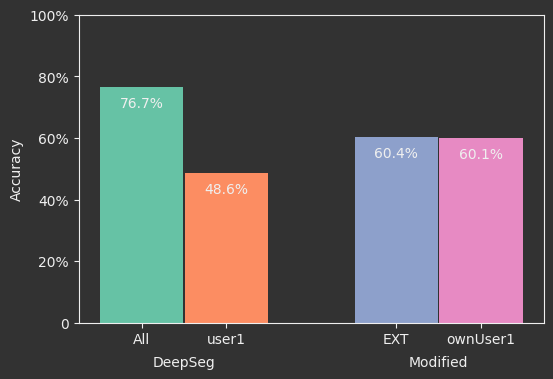

In [16]:
x = [0,1,3,4]

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(x=x, height=data_by_test6['Accuracy'], label=data_by_test6['Users'], color=sns.color_palette("Set2"), width=0.98)


ax.set_ylabel('Accuracy')

ax.set_xticks([0, 1, 3, 4])
ax.set_xticklabels(data_by_test6['Users'])
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels(['0', '20%', '40%', '60%', '80%', '100%'])

models = data_by_test6['Model'].unique()
group_label_space = 0.15
ax.text(0.5, -group_label_space, models[0], ha='center', va='bottom')
ax.text(3.5, -group_label_space, models[1], ha='center', va='bottom')


for i, v in enumerate(data_by_test6['Accuracy']):
    ax.text(x[i], v - 0.03, f'{str(round(v*100,1 ))}%', ha='center', va='top')


plt.savefig(f'plots/results/acc_defaultTest_by_user_{model_type}.svg', bbox_inches='tight', transparent=True)
plt.savefig(f'plots/results/acc_defaultTest_by_user_{model_type}.png', bbox_inches='tight', transparent=True, dpi=400)
plt.show()

# DeepSeg By Test Sequence

In [55]:

data_seqence = data.copy()
data_seqence = data_seqence[data_seqence['Model']=='DeepSeg']
data_seqence = data_seqence[data_seqence['Users']=='All']
data_seqence = data_seqence[data_seqence['Seed']=='given (10)']
data_seqence['Accuracy'] = data_seqence['Accuracy'].str.rstrip('%').astype('float') / 100.0
data_seqence.drop(columns=['Antenna Selection', 'Seed',
       'Window Size', 'Stride1', 'Stride2', 'Pool Size', 'Users'], inplace=True)
data_seqence

,Model,Test Sequence,Accuracy
0,DeepSeg,6.0,0.767
1,DeepSeg,5.0,0.756
2,DeepSeg,3.0,0.620


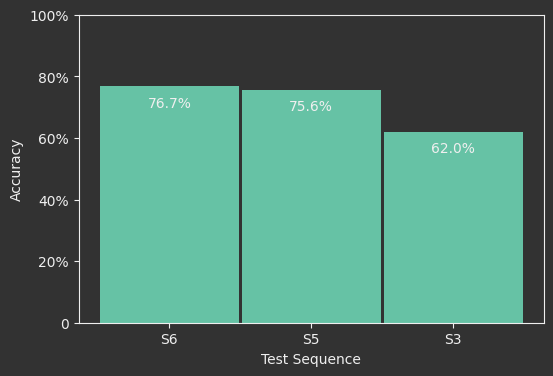

In [56]:
fig, ax = plt.subplots(figsize=(6, 4))
x = range(len(data_seqence))
ax.bar(x=x, height=data_seqence['Accuracy'], color=sns.color_palette("Set2")[0], width=0.98)

ax.set_ylabel('Accuracy')
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels(['0', '20%', '40%', '60%', '80%', '100%'])

ax.set_xticks(x)
ax.set_xticklabels([f'S{int(ts)}' for ts in data_seqence['Test Sequence']])
ax.set_xlabel('Test Sequence')

for i, v in enumerate(data_seqence['Accuracy']):
    ax.text(x[i], v - 0.03, f'{str(round(v*100,1 ))}%', ha='center', va='top')

# if infile == 'SegmentationModelPerformance.csv':
plt.savefig(f'plots/results/acc_by_sequence_{model_type}.svg', bbox_inches='tight', transparent=True)
plt.savefig(f'plots/results/acc_by_sequence_{model_type}.png', bbox_inches='tight', transparent=True, dpi=400)
plt.show()

# Best Case by Model and User

In [61]:
data_by_user = data.copy()
data_by_user.dropna(inplace=True)
data_by_user['Accuracy'] = data_by_user['Accuracy'].str.rstrip('%').astype('float') / 100.0
data_by_user.drop(columns=['Antenna Selection', 'Seed',
       'Window Size', 'Stride1', 'Stride2', 'Pool Size', 'Test Sequence'], inplace=True)
data_by_user.drop(index=3, inplace=True)
data_by_user = data_by_user.groupby(['Model', 'Users']).max().reset_index()
data_by_user

,Model,Users,Accuracy
0,DeepSeg,All,0.767
1,DeepSeg,user1,0.486
2,Modified,EXT,0.877
3,Modified,ownUser1,0.601


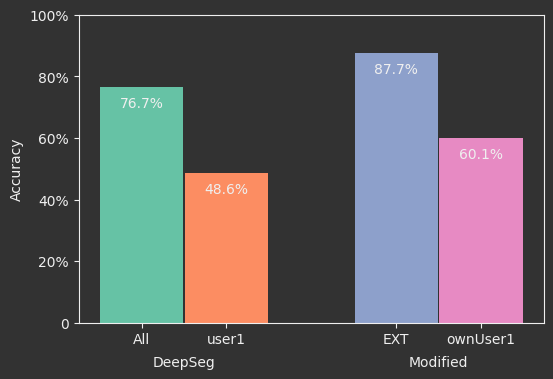

In [ ]:
x = [0,1,3,4]

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(x=x, height=data_by_user['Accuracy'], label=data_by_user['Users'], color=sns.color_palette("Set2"), width=0.98)


ax.set_ylabel('Accuracy')

ax.set_xticks([0, 1, 3, 4])
ax.set_xticklabels(data_by_user['Users'])
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels(['0', '20%', '40%', '60%', '80%', '100%'])

models = data_by_user['Model'].unique()
group_label_space = 0.15
ax.text(0.5, -group_label_space, models[0], ha='center', va='bottom')
ax.text(3.5, -group_label_space, models[1], ha='center', va='bottom')


for i, v in enumerate(data_by_user['Accuracy']):
    ax.text(x[i], v - 0.03, f'{str(round(v*100,1 ))}%', ha='center', va='top')


plt.savefig(f'plots/results/acc_bestCase_by_user_{model_type}.svg', bbox_inches='tight', transparent=True)
plt.savefig(f'plots/results/acc_bestCase_by_user_{model_type}.png', bbox_inches='tight', transparent=True, dpi=400)
plt.show()